# Handwritten Digit Recognition

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


## Historical Importance of the MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits that is commonly used for training various image processing systems and machine learning algorithms.

**Historical Significance:**

* **Benchmark Dataset:** MNIST has served as a fundamental benchmark dataset for evaluating and comparing machine learning algorithms, particularly in the fields of image recognition and classification.
* **Early Adoption:** Its widespread use in the early stages of machine learning research contributed to the advancement and development of new techniques and approaches.
* **Accessibility and Simplicity:** The dataset's simplicity and accessibility made it easy for researchers to experiment with different algorithms and compare results, accelerating progress in the field.
* **Foundation for Innovation:** MNIST played a crucial role in establishing a foundation for further research in areas like computer vision, deep learning, and artificial intelligence.

Despite its limitations and the development of more complex datasets, MNIST remains a valuable resource for educational purposes and initial explorations in image recognition tasks.

In [10]:
#Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Train and test shape
print(f"Training set - Images: {x_train.shape}, Labels: {y_train.shape[0]}")
print(f"Test set - Images: {x_test.shape}, Labels: {y_test.shape[0]}")

# Training set min and max values
print(f"Training set - Min: {x_train.min()}, Max: {x_train.max()}")
print(f"Labels - Min: {y_train.min()}, Max: {y_train.max()}")

Training set - Images: (60000, 28, 28), Labels: 60000
Test set - Images: (10000, 28, 28), Labels: 10000
Training set - Min: 0, Max: 255
Labels - Min: 0, Max: 9


Display a set of Digits and the corresponding Labels

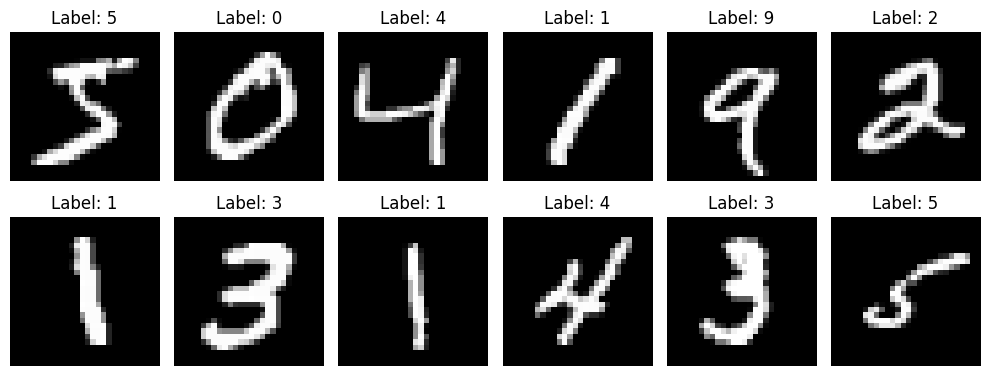

In [4]:
plt.figure(figsize=(10, 4))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Display classes distribution

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} examples")

Digit 0: 5923 examples
Digit 1: 6742 examples
Digit 2: 5958 examples
Digit 3: 6131 examples
Digit 4: 5842 examples
Digit 5: 5421 examples
Digit 6: 5918 examples
Digit 7: 6265 examples
Digit 8: 5851 examples
Digit 9: 5949 examples


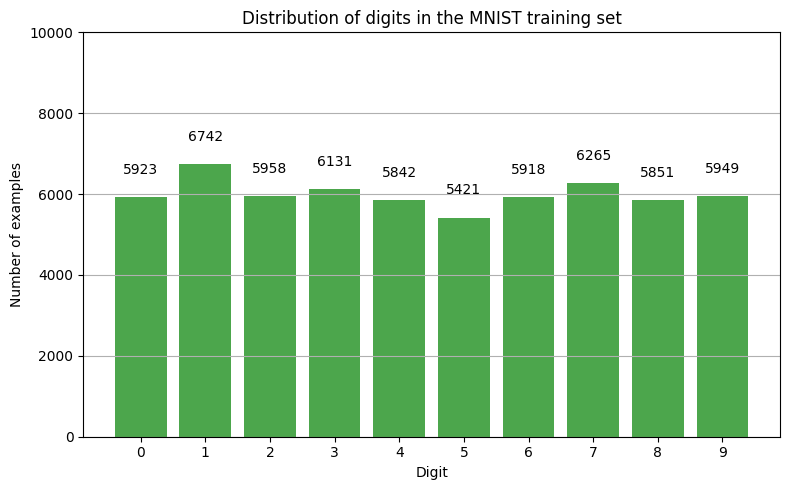

In [6]:
# Bar chart showing the number of examples per digit
plt.figure(figsize=(8, 5))
bars = plt.bar(unique, counts, color='green', alpha=0.7)
plt.ylim(0, 10000)
plt.xlabel("Digit")
plt.ylabel("Number of examples")
plt.title("Distribution of digits in the MNIST training set")
plt.xticks(unique)
plt.grid(axis='y')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Data Preprocessing: Normalization and One-Hot Encoding

This code snippet performs two crucial data preprocessing steps:

**1. Normalization:**
```python
x_train = x_train / 255.0
x_test = x_test / 255.0
```
* **Purpose:** These lines normalize the pixel values of the images in the training and testing sets.
* **Method:** Each pixel value (ranging from 0 to 255) is divided by 255.0, scaling the values to a range between 0.0 and 1.0.
* **Benefits:** Normalization helps improve the performance and stability of the model during training by:
    * Preventing features with larger values from dominating the learning process.
    * Making the optimization process faster and more efficient.


**2. One-Hot Encoding:**
```python
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
```

* **Purpose:** These lines convert the numerical labels (0-9) into a one-hot encoded format.
* **Method:** `to_categorical` function from Keras is used. It transforms the labels into a binary matrix where each row represents a sample and each column represents a class. The column corresponding to the correct label is set to 1, and all other columns are set to 0.
* **Benefits:** One-hot encoding is necessary for multi-class classification problems as it allows the model to treat each class as a separate entity and learn the relationships between them effectively.

Example:
```python
y_train[0] = 3
to_categorical(3, 10) → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
```

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [12]:
# prompt: print an example of y_train and y_train_cat to show how one-hot-encoding works

print("Example of y_train:")
print(y_train[0])  # Print the original label

print("\nCorresponding y_train_cat (one-hot encoded):")
print(y_train_cat[0]) # Print the one-hot encoded vector


Example of y_train:
5

Corresponding y_train_cat (one-hot encoded):
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build the model

In [14]:
model = Sequential([
    Input(shape=(28, 28)),          # Input layer: expects 28x28 grayscale images (like MNIST)
    Flatten(),                      # Flattens 2D 28x28 image into a 1D vector of 784 values
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit 0–9)
])


## Compile and train the model

### Understanding Training Parameters

When we train the model with:

```python
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
```

🔁 epochs=5
The model will see the entire training dataset 5 times.

Each time is called an epoch.

Increasing this value can improve learning, but too many epochs may lead to overfitting.

📦 batch_size=32
Instead of updating weights after seeing all 48,000 training examples, the model processes them in mini-batches of 32 images at a time.

Each batch causes a small update to the weights.

A batch size of 32 is a common default that balances speed and stability.

📊 validation_split=0.2
20% of the training data is held out for validation.

This validation set is not used to train the model, but helps monitor how well the model generalizes to unseen data.


ℹ️ What does 1500/1500 mean in the training output?
You’re using 80% of 60,000 images = 48,000 training examples.

With batch_size=32, the model will process:

48,000 / 32 = 1500 batches per epoch
So 1500/1500 means the model has completed all 1500 weight updates (batches) for that epoch.


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(
    x_train, y_train_cat,
    epochs=5,             # Number of times the model will see the entire training dataset
    batch_size=32,        # Number of samples processed before the model updates weights
    validation_split=0.2  # Reserve 20% of training data to evaluate generalization (validation)
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8638 - loss: 0.4737 - val_accuracy: 0.9532 - val_loss: 0.1615
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9593 - loss: 0.1432 - val_accuracy: 0.9669 - val_loss: 0.1138
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9742 - loss: 0.0877 - val_accuracy: 0.9710 - val_loss: 0.1022
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9813 - loss: 0.0649 - val_accuracy: 0.9715 - val_loss: 0.0947
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9738 - val_loss: 0.0914


## Predict outputs

In [17]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {acc:.2f}")

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.0942
Test accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Display a set of predicted outputs

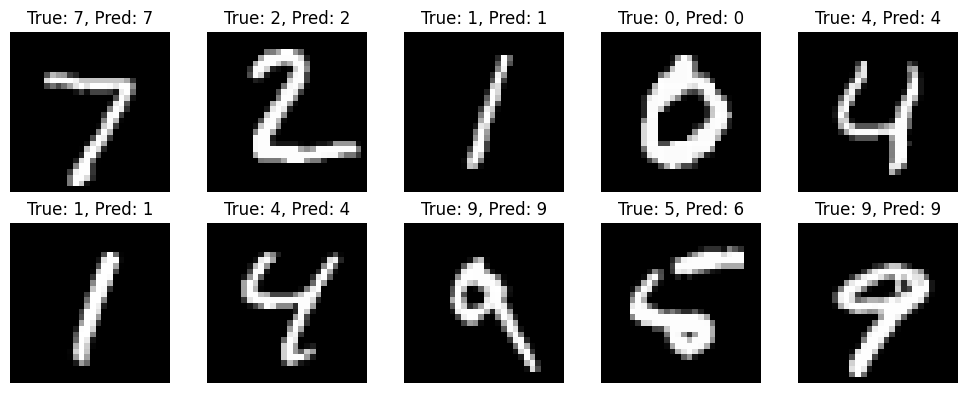

In [20]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
